In [8]:
import anndata
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


print(anndata.__version__)
import os

import sys

from scMEDAL.utils.preprocessing_utils import H5ADLoader, scRNAseq_pipeline_log, scRNAseq_pipeline_loghvg, scRNAseq_pipeline_v2, plot_results
from scMEDAL.utils.utils import save_adata
import scanpy as sc


# Environment: preprocess_and_plot_umaps_env



0.7.6


In [7]:
# To import data_base_path from paths_config
# Add the parent directory to the Python path
sys.path.append("../")

# Now you can import from the parent directory
from paths_config import data_base_path


data_base_path: /endosome/archive/bioinformatics/DLLab/src/AixaAndrade/gitfront/MyscMEDALExpt/Experiments/HealthyHeart/../data/HealthyHeart_data
outputs_path: /endosome/archive/bioinformatics/DLLab/src/AixaAndrade/gitfront/MyscMEDALExpt/Experiments/HealthyHeart/../outputs/HealthyHeart_outputs


In [11]:
# Path to the directory containing raw data
# Example: /MyscMEDALExpt/Experiments/data/HealthyHeart_data/raw
parent_path = os.path.join(data_base_path, "raw")

# Name of the .h5ad file
healthy_heart_file = "Healthy_human_heart_adata.h5ad"

# Full path to the .h5ad file
file_path = os.path.join(parent_path, healthy_heart_file)

# Print the file path for verification (optional)
print("File path:", file_path)


File path: /endosome/archive/bioinformatics/DLLab/src/AixaAndrade/gitfront/MyscMEDALExpt/Experiments/HealthyHeart/../data/HealthyHeart_data/raw/Healthy_human_heart_adata.h5ad


In [12]:
# Load adata with H5ADLoader
loader = H5ADLoader(file_path)
loader.load_h5ad()
adata = loader.create_anndata()
# save adata raw
# save_adata(adata,parent_path)


Reading X
CSR matrix created successfully with shape: [486134  33538], Transposed: False
Reading: X
Reading: layers
No data found under key 'layers'
Reading: obs
Reading: obsm
Reading: obsp
No data found under key 'obsp'
Reading: uns
Reading: var
Reading: varm
No data found under key 'varm'
Reading: varp
No data found under key 'varp'


In [6]:
adata.X


<486134x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 612809665 stored elements in Compressed Sparse Row format>

In [7]:
adata

AnnData object with n_obs × n_vars = 486134 × 33538
    obs: 'Age', 'AgeBin', 'DeathType', 'DonorID', 'Gender', 'Organ', 'Race', 'SampleType', 'Source', 'Tissue', 'TissueDetail', '_index', 'celltype', 'protocol', 'sampleID'
    var: '_index', 'gene_ids'
    uns: 'celltype_colors'
    obsm: 'X_umap'

In [8]:
loader.adata_dict

{'X': <486134x33538 sparse matrix of type '<class 'numpy.float32'>'
 	with 612809665 stored elements in Compressed Sparse Row format>,
 'layers': {},
 'obs':         Age AgeBin               DeathType DonorID  Gender  Organ       Race  \
 0       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
 1       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
 2       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
 3       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
 4       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
 ...     ...    ...                     ...     ...     ...    ...        ...   
 486129  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
 486130  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
 486131  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
 486132  NaN  60-65  DCD(circulat

In [3]:
loader.adata_dict.keys()
loader.adata_dict['obs']

Age AgeBin               DeathType DonorID  Gender  Organ       Race  \
0       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
1       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
2       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
3       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
4       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
...     ...    ...                     ...     ...     ...    ...        ...   
486129  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486130  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486131  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486132  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486133  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   

               SampleType  Source Tissue TissueDetail  \
0       Pulmonary disease  Nuclei     AX         apex   
1       Pulmonary disease  Nuclei     AX         apex   
2       Pulmonary disease  Nuclei     AX         apex   
3       Pulmonary disease  Nuclei     AX         apex   
4       Pulmonary disease  Nuclei     AX         apex   
...                   ...     ...    ...          ...   
486129             normal   CD45+     AX         apex   
486130             normal   CD45+     AX         apex   
486131             normal   CD45+     AX         apex   
486132             normal   CD45+     AX         apex   
486133             normal   CD45+     AX         apex   

                                       _index                   celltype  \
0            b'AAACCCAAGAACGCGT-1-H0015_apex'        Smooth_muscle_cells   
1            b'AAACCCAAGCAAACAT-1-H0015_apex'  Ventricular_Cardiomyocyte   
2            b'AAACCCAAGCTACTGT-1-H0015_apex'  Ventricular_Cardiomyocyte   
3            b'AAACCCAGTACCGCGT-1-H0015_apex'                  Pericytes   
4            b'AAACCCATCAAACCCA-1-H0015_apex'  Ventricular_Cardiomyocyte   
...                                       ...                        ...   
486129  b'TTTGTTGTCATACGGT-1-HCAHeart8102862'                Endothelial   
486130  b'TTTGTTGTCCTACCAC-1-HCAHeart8102862'                Endothelial   
486131  b'TTTGTTGTCGACGCTG-1-HCAHeart8102862'                Endothelial   
486132  b'TTTGTTGTCGGCTGAC-1-HCAHeart8102862'                Endothelial   
486133  b'TTTGTTGTCGGTGTTA-1-HCAHeart8102862'                Endothelial   

       protocol         sampleID  
0       10X3'V3       H0015_apex  
1       10X3'V3       H0015_apex  
2       10X3'V3       H0015_apex  
3       10X3'V3       H0015_apex  
4       10X3'V3       H0015_apex  
...         ...              ...  
486129  10X3'V3  HCAHeart8102862  
486130  10X3'V3  HCAHeart8102862  
486131  10X3'V3  HCAHeart8102862  
486132  10X3'V3  HCAHeart8102862  
486133  10X3'V3  HCAHeart8102862  

[486134 rows x 15 columns]

In [12]:
adata.obs[["DonorID","sampleID"]]

DonorID         sampleID
0           H5       H0015_apex
1           H5       H0015_apex
2           H5       H0015_apex
3           H5       H0015_apex
4           H5       H0015_apex
...        ...              ...
486129     D11  HCAHeart8102862
486130     D11  HCAHeart8102862
486131     D11  HCAHeart8102862
486132     D11  HCAHeart8102862
486133     D11  HCAHeart8102862

[486134 rows x 2 columns]

In [19]:
# Group by "DonorID" and "sampleID" and count the occurrences
grouped_counts = adata.obs.groupby(["DonorID", "sampleID"]).size().reset_index(name='count')

grouped_counts.to_csv("donor-batch-cellcounts.csv")

# Display the resulting DataFrame
print(grouped_counts[grouped_counts["count"]>0])

     DonorID         sampleID  count
36        D1  HCAHeart7606896    206
43        D1  HCAHeart7664652   4156
46        D1  HCAHeart7698015   3534
47        D1  HCAHeart7698016   3420
48        D1  HCAHeart7698017   1067
...      ...              ...    ...
1936      H7         H0035_LV   7264
1937      H7         H0035_RA   1491
1938      H7         H0035_RV   9349
1939      H7       H0035_apex   3487
1940      H7     H0035_septum   3862

[147 rows x 3 columns]


In [22]:
grouped_counts = adata.obs.groupby(["DonorID", "TissueDetail"]).size().reset_index(name='count')
grouped_counts.to_csv("donor-tissue-cellcounts.csv")

<ipython-input-24-a6b59c58da3f>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_counts, x='DonorID', y='count', hue='TissueDetail', ci=None)


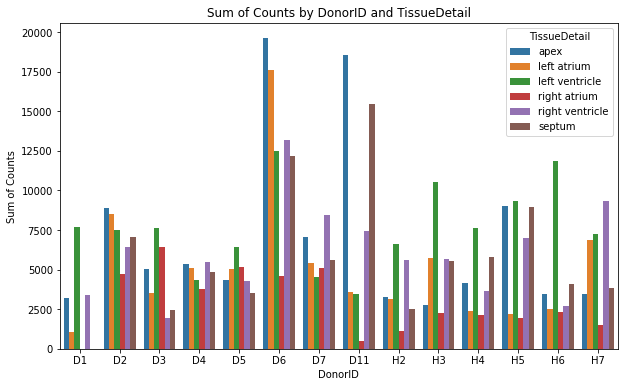

In [24]:



# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=grouped_counts, x='DonorID', y='count', hue='TissueDetail', ci=None)

plt.title('Sum of Counts by DonorID and TissueDetail')
plt.xlabel('DonorID')
plt.ylabel('Sum of Counts')
plt.legend(title='TissueDetail')

# Save the figure before calling plt.show()
plt.savefig('counts_by_donor_and_tissue.png', dpi=300)  # Adjust path, filename, and DPI as needed

# Show the plot
plt.show()


<ipython-input-25-e17fca6a742a>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped_counts, x='DonorID', y='count', hue='TissueDetail', ci=None, palette=tissue_palette)


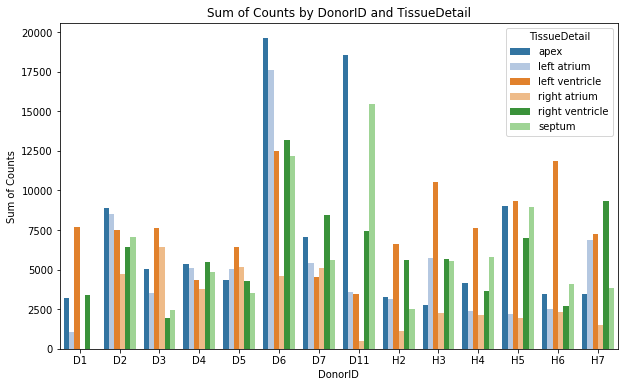

In [25]:



# Assuming 'grouped_counts' and 'adata' are already defined

# Generate a unique color for each TissueDetail
unique_colorcol = np.unique(adata.obs['TissueDetail'])
palette_choice = "tab20"

# Create a palette that maps each TissueDetail to a color in the "tab20" palette
palette = sns.color_palette(palette_choice, n_colors=len(unique_colorcol))
tissue_palette = dict(zip(unique_colorcol, palette))

# Create a bar plot with the specified palette
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_counts, x='DonorID', y='count', hue='TissueDetail', ci=None, palette=tissue_palette)

plt.title('Sum of Counts by DonorID and TissueDetail')
plt.xlabel('DonorID')
plt.ylabel('Sum of Counts')
plt.legend(title='TissueDetail')

# Save the figure
plt.savefig('counts_by_donor_and_tissue_with_palette.png', dpi=300)

# Show the plot
plt.show()


In [6]:
adata.obs["DonorID"]

0          H5
1          H5
2          H5
3          H5
4          H5
         ... 
486129    D11
486130    D11
486131    D11
486132    D11
486133    D11
Name: DonorID, Length: 486134, dtype: category
Categories (14, object): ['D1', 'D2', 'D3', 'D4', ..., 'H4', 'H5', 'H6', 'H7']

In [7]:
adata.obs["sampleID"]

0              H0015_apex
1              H0015_apex
2              H0015_apex
3              H0015_apex
4              H0015_apex
               ...       
486129    HCAHeart8102862
486130    HCAHeart8102862
486131    HCAHeart8102862
486132    HCAHeart8102862
486133    HCAHeart8102862
Name: sampleID, Length: 486134, dtype: category
Categories (147, object): ['H0015_LA_new', 'H0015_LV', 'H0015_RA', 'H0015_RV', ..., 'HCAHeart8287125', 'HCAHeart8287126', 'HCAHeart8287127', 'HCAHeart8287128']

In [8]:
adata

AnnData object with n_obs × n_vars = 486134 × 33538
    obs: 'Age', 'AgeBin', 'DeathType', 'DonorID', 'Gender', 'Organ', 'Race', 'SampleType', 'Source', 'Tissue', 'TissueDetail', '_index', 'celltype', 'protocol', 'sampleID'
    var: '_index', 'gene_ids'
    uns: 'celltype_colors'
    obsm: 'X_umap'

In [7]:
adata.X

<486134x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 612809665 stored elements in Compressed Sparse Row format>

In [15]:
# save adata log
log_path = "/archive/bioinformatics/DLLab/AixaAndrade/data/Genomic_data/heart_data/Healthy_human_heart_data/log_transformed"
adata_log = scRNAseq_pipeline_log(adata, min_genes_per_cell=10, min_cells_per_gene=3, total_counts_per_cell=10000)
save_adata(adata_log,log_path)


Folder already exists: /archive/bioinformatics/DLLab/AixaAndrade/data/Genomic_data/heart_data/Healthy_human_heart_data/log


In [5]:
log_3000hvg_path = "/archive/bioinformatics/DLLab/AixaAndrade/data/Genomic_data/heart_data/Healthy_human_heart_data/log_transformed_3000hvggenes"

adata_log_hvg = scRNAseq_pipeline_loghvg(adata, min_genes_per_cell=10, min_cells_per_gene=3, total_counts_per_cell=10000,n_top_genes=3000)
save_adata(adata_log_hvg,log_3000hvg_path)

Created folder: /archive/bioinformatics/DLLab/AixaAndrade/data/Genomic_data/heart_data/Healthy_human_heart_data/log_transformed_3000hvggenes


In [6]:
adata_log_hvg

AnnData object with n_obs × n_vars = 486134 × 3000
    obs: 'Age', 'AgeBin', 'DeathType', 'DonorID', 'Gender', 'Organ', 'Race', 'SampleType', 'Source', 'Tissue', 'TissueDetail', '_index', 'celltype', 'protocol', 'sampleID', 'n_genes'
    var: '_index', 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'log1p', 'hvg'
    obsm: 'X_umap'

In [14]:
adata_log.obs

Age AgeBin               DeathType DonorID  Gender  Organ       Race  \
0       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
1       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
2       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
3       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
4       NaN  50-55        DBD(brain death)      H5  Female  Heart  Caucasian   
...     ...    ...                     ...     ...     ...    ...        ...   
486129  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486130  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486131  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486132  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   
486133  NaN  60-65  DCD(circulatory death)     D11  Female  Heart  Caucasian   

               SampleType  Source Tissue TissueDetail  \
0       Pulmonary disease  Nuclei     AX         apex   
1       Pulmonary disease  Nuclei     AX         apex   
2       Pulmonary disease  Nuclei     AX         apex   
3       Pulmonary disease  Nuclei     AX         apex   
4       Pulmonary disease  Nuclei     AX         apex   
...                   ...     ...    ...          ...   
486129             normal   CD45+     AX         apex   
486130             normal   CD45+     AX         apex   
486131             normal   CD45+     AX         apex   
486132             normal   CD45+     AX         apex   
486133             normal   CD45+     AX         apex   

                                       _index                   celltype  \
0            b'AAACCCAAGAACGCGT-1-H0015_apex'        Smooth_muscle_cells   
1            b'AAACCCAAGCAAACAT-1-H0015_apex'  Ventricular_Cardiomyocyte   
2            b'AAACCCAAGCTACTGT-1-H0015_apex'  Ventricular_Cardiomyocyte   
3            b'AAACCCAGTACCGCGT-1-H0015_apex'                  Pericytes   
4            b'AAACCCATCAAACCCA-1-H0015_apex'  Ventricular_Cardiomyocyte   
...                                       ...                        ...   
486129  b'TTTGTTGTCATACGGT-1-HCAHeart8102862'                Endothelial   
486130  b'TTTGTTGTCCTACCAC-1-HCAHeart8102862'                Endothelial   
486131  b'TTTGTTGTCGACGCTG-1-HCAHeart8102862'                Endothelial   
486132  b'TTTGTTGTCGGCTGAC-1-HCAHeart8102862'                Endothelial   
486133  b'TTTGTTGTCGGTGTTA-1-HCAHeart8102862'                Endothelial   

       protocol         sampleID  n_genes  
0       10X3'V3       H0015_apex      480  
1       10X3'V3       H0015_apex     1365  
2       10X3'V3       H0015_apex     1521  
3       10X3'V3       H0015_apex      726  
4       10X3'V3       H0015_apex     1584  
...         ...              ...      ...  
486129  10X3'V3  HCAHeart8102862      904  
486130  10X3'V3  HCAHeart8102862      692  
486131  10X3'V3  HCAHeart8102862      847  
486132  10X3'V3  HCAHeart8102862     1925  
486133  10X3'V3  HCAHeart8102862     1422  

[486134 rows x 16 columns]

/archive/bioinformatics/DLLab/shared/CondaEnvironments/Aixa_scDML/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


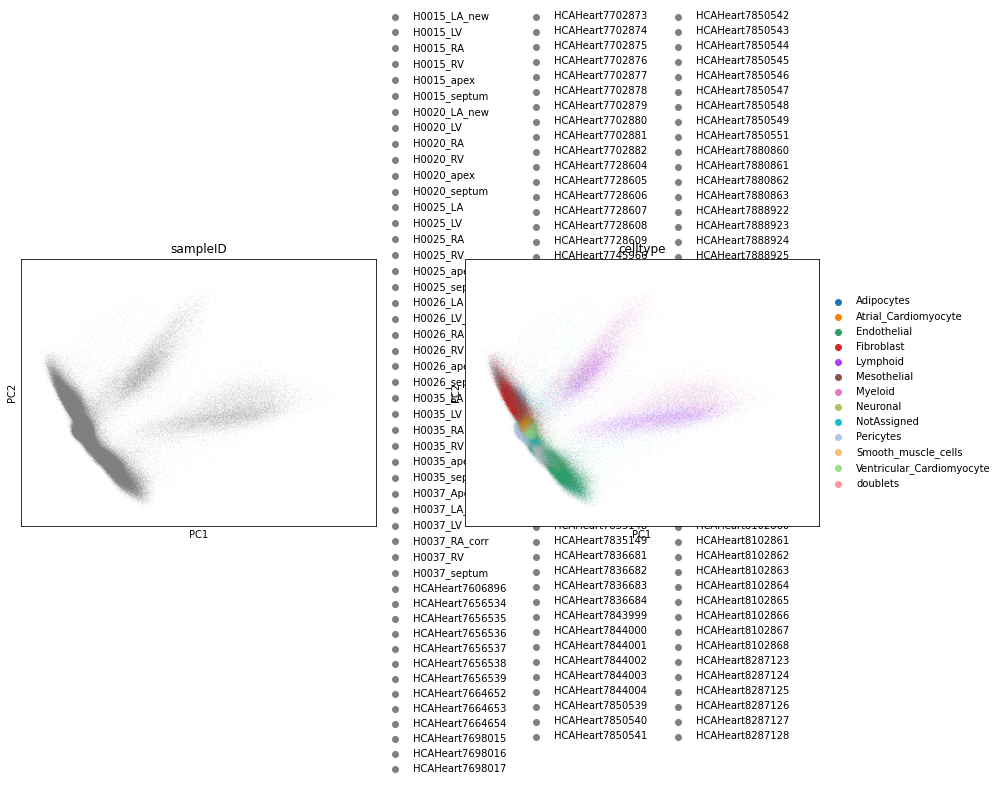

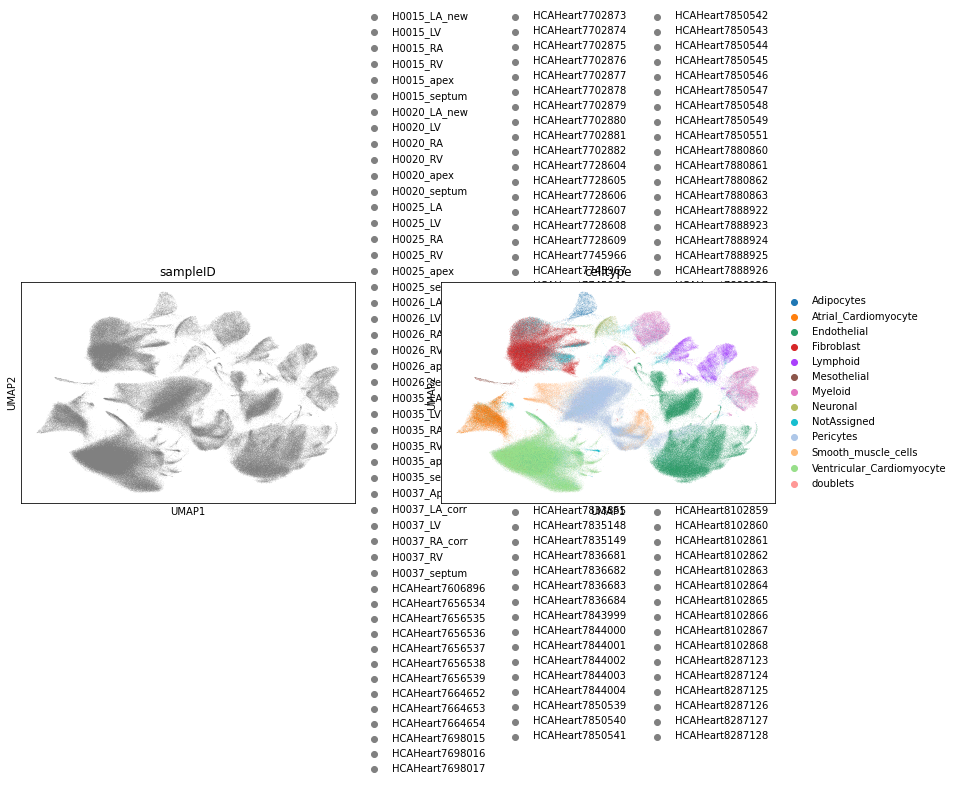

In [11]:
# Usage example:

processed_adata = scRNAseq_pipeline_v2(adata)
#plot_pca(processed_adata,sample_id_column='sampleID')

plot_results(processed_adata,batch_column='sampleID', celltype_column="celltype")

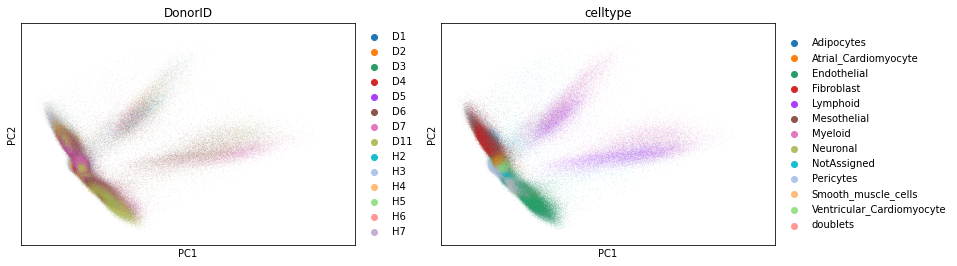

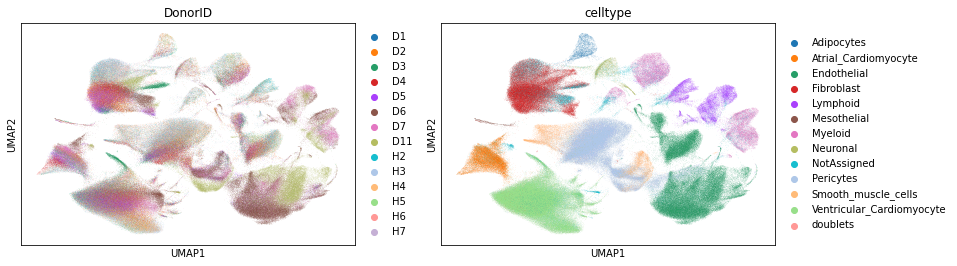

In [12]:
# Plot donors 
sc.pl.pca(processed_adata,color=['DonorID', 'celltype'],save='heart_latent_donor.png')
sc.pl.umap(processed_adata,color=['DonorID', 'celltype'],save='heart_latent_donor.png')


In [161]:
adata

AnnData object with n_obs × n_vars = 486134 × 33538
    obs: 'Age', 'AgeBin', 'DeathType', 'DonorID', 'Gender', 'Organ', 'Race', 'SampleType', 'Source', 'Tissue', 'TissueDetail', '_index', 'celltype', 'protocol', 'sampleID'
    var: '_index', 'gene_ids'
    uns: 'celltype_colors'
    obsm: 'X_umap'

In [10]:
9519+7783+2900+68579+8340+7046+8186

112353